In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# FinanceDataReader 에서 대한항공 데이터 가지고 오기(5년)
df = fdr.DataReader("003490","2018-01-01","2023-07-31")
df_koreaair = df[["Close"]]
df_koreaair

,Close
Date,
2018-01-02,23278
2018-01-03,23181
2018-01-04,22630
2018-01-05,22630
2018-01-08,23408
...,...
2023-07-25,24750
2023-07-26,24150
2023-07-27,24700


In [3]:
# 유가 데이터 가져오기
# 서부 텍사스 중질유(WTI Crude), monthly
df_oil = pdr.DataReader('POILDUBUSDM', 'fred', start='2018-01-01')

df_oil.tail(10)
df_oil.columns = ["유가데이터"]
df_oil

,유가데이터
DATE,
2018-01-01,66.024783
2018-02-01,62.631000
2018-03-01,63.917273
2018-04-01,68.667143
2018-05-01,74.077826
...,...
2023-06-01,74.729545
2023-07-01,80.645714
2023-08-01,86.123043


In [4]:
# 환율 데이터 들고오기

df_ex = fdr.DataReader("USD/KRW","2020-01-01","2023-07-31")
df_ex = df_ex[["Close"]]
df_ex

,Close
Date,
2020-01-01,1153.750000
2020-01-02,1153.969971
2020-01-03,1157.150024
2020-01-06,1165.849976
2020-01-07,1167.420044
...,...
2023-07-24,1285.650024
2023-07-25,1280.530029
2023-07-26,1274.119995


In [5]:
# 코스피 지수
df_kospi = fdr.DataReader("KS11","2018-01-01","2023-07-31")
df_kospi = df_kospi[["Close"]]
df_kospi

,Close
Date,
2018-01-02,2479.649902
2018-01-03,2486.350098
2018-01-04,2466.459961
2018-01-05,2497.520020
2018-01-08,2513.280029
...,...
2023-07-24,2628.530029
2023-07-25,2636.459961
2023-07-26,2592.360107


In [6]:
# 10년만기 한국국채 수익률 2018.01.01~2023.07.31 - 출처 investing.com
df_bond = pd.read_csv("./한국 10년 수익률.csv")
df_bond["날짜"] = pd.to_datetime(df_bond["날짜"])
df_bond.set_index('날짜',inplace=True)
df_bond = df_bond[["종가"]]
df_bond

,종가
날짜,
2023-07-31,3.758
2023-07-30,3.731
2023-07-29,3.731
2023-07-28,3.727
2023-07-27,3.637
...,...
2018-01-06,2.515
2018-01-05,2.519
2018-01-04,2.523


In [7]:
# 월말 데이터로 변경
df_koreaair  = df_koreaair.resample('M').last()
df_oil  = df_oil.resample('M').last()
df_kospi  = df_kospi.resample('M').last()
df_ex  = df_ex.resample('M').last()
df_bond  = df_bond.resample('M').last()

In [8]:
df_koreaair["월수익률_대한항공"] = df_koreaair["Close"].pct_change()
df_koreaair.dropna(inplace=True)
df_koreaair.reset_index(inplace=True)
df_koreaair

,Date,Close,월수익률_대한항공
0,2018-02-28,21171,-0.153024
1,2018-03-31,21916,0.035190
2,2018-04-30,22144,0.010403
3,2018-05-31,20717,-0.064442
4,2018-06-30,18318,-0.115799
...,...,...,...
61,2023-03-31,23200,0.019780
62,2023-04-30,22850,-0.015086
63,2023-05-31,22100,-0.032823
64,2023-06-30,24350,0.101810


In [9]:
df_oil["월수익률_유가"] = df_oil["유가데이터"].pct_change()
df_oil.dropna(inplace=True)
df_oil.reset_index(inplace=True)
df_oil

,DATE,유가데이터,월수익률_유가
0,2018-02-28,62.631000,-0.051402
1,2018-03-31,63.917273,0.020537
2,2018-04-30,68.667143,0.074313
3,2018-05-31,74.077826,0.078796
4,2018-06-30,73.311429,-0.010346
...,...,...,...
64,2023-06-30,74.729545,-0.000797
65,2023-07-31,80.645714,0.079168
66,2023-08-31,86.123043,0.067918
67,2023-09-30,93.238571,0.082620


In [10]:
df_kospi["월수익률_코스피"] = df_kospi["Close"].pct_change()
df_kospi.dropna(inplace=True)
df_kospi.reset_index(inplace=True)
df_kospi

,Date,Close,월수익률_코스피
0,2018-02-28,2427.360107,-0.054199
1,2018-03-31,2445.850098,0.007617
2,2018-04-30,2515.379883,0.028428
3,2018-05-31,2423.010010,-0.036722
4,2018-06-30,2326.129883,-0.039983
...,...,...,...
61,2023-03-31,2476.860107,0.026529
62,2023-04-30,2501.530029,0.009960
63,2023-05-31,2577.120117,0.030218
64,2023-06-30,2564.280029,-0.004982


In [11]:
df_ex["월수익률_환율"] = df_ex["Close"].pct_change()
df_ex.dropna(inplace=True)
df_ex.reset_index(inplace=True)
df_ex

,Date,Close,월수익률_환율
0,2020-02-29,1211.310059,0.020377
1,2020-03-31,1222.699951,0.009403
2,2020-04-30,1210.790039,-0.009741
3,2020-05-31,1237.979980,0.022456
4,2020-06-30,1198.489990,-0.031899
5,2020-07-31,1189.560059,-0.007451
6,2020-08-31,1179.589966,-0.008381
7,2020-09-30,1167.859985,-0.009944
8,2020-10-31,1129.520020,-0.032829
9,2020-11-30,1104.329956,-0.022302


In [12]:
df_bond["월수익률_금리"] = df_bond["종가"].pct_change()
df_bond.dropna(inplace=True)
df_bond.reset_index(inplace=True)
df_bond

,날짜,종가,월수익률_금리
0,2018-02-28,2.736,-0.011918
1,2018-03-31,2.622,-0.041667
2,2018-04-30,2.712,0.034325
3,2018-05-31,2.694,-0.006637
4,2018-06-30,2.555,-0.051596
...,...,...,...
61,2023-03-31,3.333,-0.111437
62,2023-04-30,3.367,0.010201
63,2023-05-31,3.532,0.049005
64,2023-06-30,3.697,0.046716


In [13]:
# 데이터 합치기 
df_all = pd.concat([df_koreaair["월수익률_대한항공"],df_oil["월수익률_유가"],df_kospi["월수익률_코스피"],df_ex["월수익률_환율"],df_bond["월수익률_금리"]],axis=1)
df_all.dropna(inplace=True)
df_all

,월수익률_대한항공,월수익률_유가,월수익률_코스피,월수익률_환율,월수익률_금리
0,-0.153024,-0.051402,-0.054199,0.020377,-0.011918
1,0.035190,0.020537,0.007617,0.009403,-0.041667
2,0.010403,0.074313,0.028428,-0.009741,0.034325
3,-0.064442,0.078796,-0.036722,0.022456,-0.006637
4,-0.115799,-0.010346,-0.039983,-0.031899,-0.051596
5,0.033628,-0.007392,-0.013271,-0.007451,-0.005871
6,-0.039400,-0.002402,0.012033,-0.008381,-0.089764
7,0.001759,0.059649,0.008692,-0.009944,0.018599
8,-0.023106,0.023888,-0.133748,-0.032829,-0.048408
9,0.162088,-0.178723,0.033094,-0.022302,-0.060687


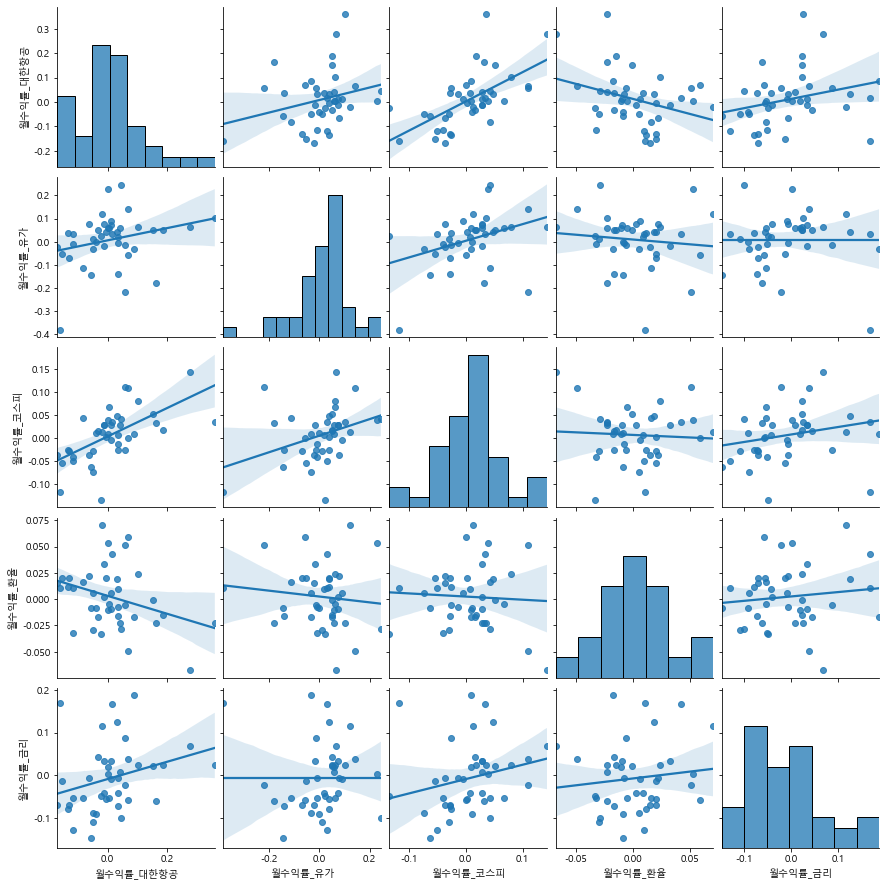

In [14]:
# pairplot 확인
sns.pairplot(df_all, kind='reg')

In [15]:
# 상관계수 확인
import scipy.stats

df_all.corr()

,월수익률_대한항공,월수익률_유가,월수익률_코스피,월수익률_환율,월수익률_금리
월수익률_대한항공,1.000000,0.260818,0.607275,-0.323985,0.277427
월수익률_유가,0.260818,1.000000,0.359734,-0.107624,0.000047
월수익률_코스피,0.607275,0.359734,1.000000,-0.057633,0.233576
월수익률_환율,-0.323985,-0.107624,-0.057633,1.000000,0.115765
월수익률_금리,0.277427,0.000047,0.233576,0.115765,1.000000


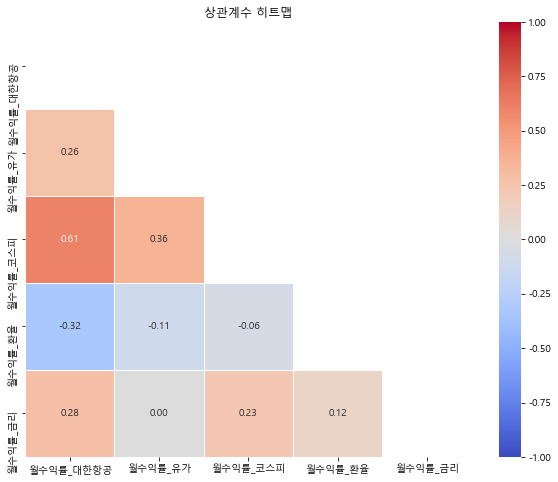

In [16]:
# hitmap 시각화
correlation_matrix = df_all.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmin=-1, vmax=1)
plt.title('상관계수 히트맵')
plt.show()

In [17]:
# 회귀분석
# 필요한 라이브러리

import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.

target = df_all['월수익률_대한항공']
feature = df_all[['월수익률_유가', '월수익률_코스피', '월수익률_환율', '월수익률_금리']]

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.

feature_add = sm.add_constant(feature, has_constant='add')

# 상수항 더한 것 확인
# feature_add

In [18]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              월수익률_대한항공   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     8.743
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           4.50e-05
Time:                        16:50:35   Log-Likelihood:                 47.652
No. Observations:                  42   AIC:                            -85.30
Df Residuals:                      37   BIC:                            -76.61
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.013      0.515      0.610      -0.020       0.033
월수익률_유가        0.0355      0.126      0.281      0.780      -0.220       0.291
월수익률_코스피       1.0550      0.259      4.074      0.000       0.530       1.580
월수익률_환율       -1.1867      0.456     -2.605      0.013      -2.110      -0.264
월수익률_금리        0.2611      0.169      1.541      0.132      -0.082       0.604
==============================================================================
Omnibus:                       14.727   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.713
Skew:                           1.145   Prob(JB):                     0.000142
Kurtosis:                       5.208   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""